$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{Ques 1}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



Write your answer here:

$f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2 
= x_1^2 + x_2^2 + 200x_1 -50x_2 + 10625$

So we take:

 $ \mathbf{A} $  $ = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$

 $ \mathbf{x} =  \begin{bmatrix} x_1 \\ x_2\end{bmatrix} $
 
 $ \mathbf{b} = \begin{bmatrix} 100 \\ -25 \end{bmatrix}$

 $ \mathbf{c} = 10625 $

 And so the function $f(\mathbf{x})$ can be written in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$.


$\textbf{Ques 2:}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

Write your answer here:

We can write $f(x)$ as $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$.

according to question , $$x-α∇f(x)= \begin{bmatrix}
x_1\\
x_2
\end{bmatrix}-\alpha\begin{bmatrix}
2(x_1+100)\\
2(x_2-25)
\end{bmatrix}\\
⇒\begin{bmatrix}
x_1(1-2\alpha)-200\alpha\\
x_2(1-2\alpha)+50\alpha
\end{bmatrix}\\
$$
Now $f(x-α∇f(x)) = $ $=>f(\begin{bmatrix}
x_1(1-2\alpha)-200\alpha\\
x_2(1-2\alpha)+50\alpha
\end{bmatrix})= (x_1(1-2α)-200\alpha+100)^2+(x_2(1-2α)+25(2\alpha-1)^2$

For minimum ,

we will differentiate  $ f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ with respect to $α$
 and  put the derivative equal to 0.

By differenciating , we get zero at ⍺= 0.5

So, $f(\mathbf{x} - \alpha \nabla f(\mathbf{x})$ will be minimum at α=0.5

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [29]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [30]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [31]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [32]:
#Completing the module to compute the steplength
def compute_steplength(initial_point,gradient_x): #add appropriate arguments to the function 
  assert type(initial_point) is np.ndarray and len(initial_point)==2
  assert type(gradient_x) is np.ndarray and len(gradient_x) == 2
  step_length = 1
  c=0.0001
  rho=0.5
  u=c*step_length*(np.linalg.multi_dot([gradient_x,gradient_x]))
  while evalf(initial_point - step_length*gradient_x)>evalf(initial_point)-u:
    step_length = rho*step_length
  return step_length

In [33]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x,g_x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k


In [34]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


(array([-100.,   25.]), 1)

Ques 4:

In [35]:
start_x=np.array([10,10])
Tolerance_values=[10**(-p) for p in range(1,11,1)] 

In [36]:
Num_of_iterations=[]
for i in range(10):
  final_minimizer,num_iter = find_minimizer(start_x,Tolerance_values[i])
  Num_of_iterations.append(num_iter)
  

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.

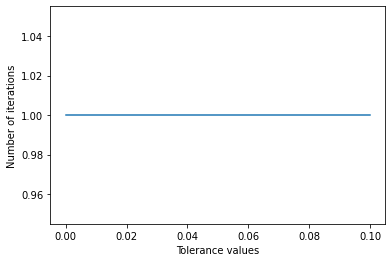

In [37]:
import matplotlib.pyplot as plt
plt.plot(Tolerance_values,Num_of_iterations)
plt.xlabel("Tolerance values")
plt.ylabel('Number of iterations')
plt.show()

Observation : \\
In Ex 1 we have seen that when the step length is constant the for the lower tolerance values we saw that we had more number of iterations but now when the step length is not constant we have fix number of iterations